In [1]:
import pandas as pd
import os
import tifffile as tiff
import matplotlib.pyplot as plt
import pathophys as pp
import numpy as np
import math
import seaborn as sns
from scipy.stats import norm

def getimfolder(experiment):
    import os
    basedir = ""
    data = "D:\Raphael\Data"
    for folder in os.listdir(data):
        if str(experiment) in folder:
            basedir = os.path.join(data, folder)
    return basedir

experiment = "X"
basedir = getimfolder(experiment)

In [2]:
idf = pd.read_excel(os.path.join(basedir, "Info.xlsx"))
cdf = pd.read_csv(os.path.join(basedir, "CellInfo.csv"))
cdf.head()

,Unnamed: 0,label,bbox-0_GFP,bbox-1_GFP,bbox-2_GFP,bbox-3_GFP,intensity_max_GFP,intensity_min_GFP,intensity_mean_GFP,measure_median_GFP,bbox-0_AB,bbox-1_AB,bbox-2_AB,bbox-3_AB,intensity_max_AB,intensity_min_AB,intensity_mean_AB,measure_median_AB,NDID,CID
0,0,1,1371,789,1694,1097,131.0,92.0,110.967443,111.0,1371,789,1694,1097,201.0,103.0,136.116352,134.0,0,1
1,1,2,755,536,1086,906,131.0,92.0,111.605168,111.0,755,536,1086,906,198.0,107.0,141.408126,140.0,0,2
2,2,3,1831,1320,2048,1589,147.0,94.0,119.543002,119.0,1831,1320,2048,1589,227.0,111.0,150.321190,147.0,0,3
3,3,4,178,805,453,1229,205.0,93.0,115.686093,114.0,178,805,453,1229,240.0,111.0,141.422976,140.0,0,4
4,4,5,1481,1146,1719,1361,242.0,95.0,148.879309,151.0,1481,1146,1719,1361,452.0,108.0,229.511708,242.0,0,5


In [3]:
print(len(cdf))

28578


In [4]:
ddfs = []
for i in range(4):
    ddfs.append(cdf[cdf["bbox-"+str(i)+"_GFP"]==cdf["bbox-"+str(i)+"_GFP"].min()])
    ddfs.append(cdf[cdf["bbox-"+str(i)+"_GFP"]==cdf["bbox-"+str(i)+"_GFP"].max()])
dropdf = pd.concat(ddfs)
dropdf.head()
print(dropdf.shape)

(7948, 20)


In [5]:
cdf.drop(dropdf.index)

,Unnamed: 0,label,bbox-0_GFP,bbox-1_GFP,bbox-2_GFP,bbox-3_GFP,intensity_max_GFP,intensity_min_GFP,intensity_mean_GFP,measure_median_GFP,bbox-0_AB,bbox-1_AB,bbox-2_AB,bbox-3_AB,intensity_max_AB,intensity_min_AB,intensity_mean_AB,measure_median_AB,NDID,CID
0,0,1,1371,789,1694,1097,131.0,92.0,110.967443,111.0,1371,789,1694,1097,201.0,103.0,136.116352,134.0,0,1
1,1,2,755,536,1086,906,131.0,92.0,111.605168,111.0,755,536,1086,906,198.0,107.0,141.408126,140.0,0,2
3,3,4,178,805,453,1229,205.0,93.0,115.686093,114.0,178,805,453,1229,240.0,111.0,141.422976,140.0,0,4
4,4,5,1481,1146,1719,1361,242.0,95.0,148.879309,151.0,1481,1146,1719,1361,452.0,108.0,229.511708,242.0,0,5
5,5,6,1123,564,1494,1006,138.0,91.0,110.687786,111.0,1123,564,1494,1006,200.0,101.0,135.764087,134.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28569,38,39,310,980,603,1355,135.0,92.0,111.524253,111.0,310,980,603,1355,333.0,110.0,153.707994,152.0,360,28947
28570,39,40,973,557,1342,882,129.0,90.0,110.247324,110.0,973,557,1342,882,263.0,104.0,133.469599,132.0,360,28948
28572,41,42,621,1126,886,1367,130.0,92.0,110.029467,110.0,621,1126,886,1367,180.0,105.0,131.423569,131.0,360,28950
28573,42,43,547,1330,790,1540,133.0,91.0,111.413436,111.0,547,1330,790,1540,324.0,112.0,166.074263,157.0,360,28951


(array([1.8287e+04, 4.0020e+03, 1.8850e+03, 9.6100e+02, 8.3600e+02,
        5.0300e+02, 4.2700e+02, 2.6500e+02, 2.4900e+02, 1.7300e+02,
        1.3900e+02, 1.4300e+02, 8.6000e+01, 8.9000e+01, 6.5000e+01,
        5.9000e+01, 3.6000e+01, 3.3000e+01, 2.9000e+01, 4.1000e+01,
        2.6000e+01, 2.1000e+01, 2.1000e+01, 2.2000e+01, 1.4000e+01,
        8.0000e+00, 1.2000e+01, 8.0000e+00, 4.0000e+00, 1.0000e+01,
        8.0000e+00, 4.0000e+00, 9.0000e+00, 6.0000e+00, 5.0000e+00,
        4.0000e+00, 5.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00,
        5.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 4.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

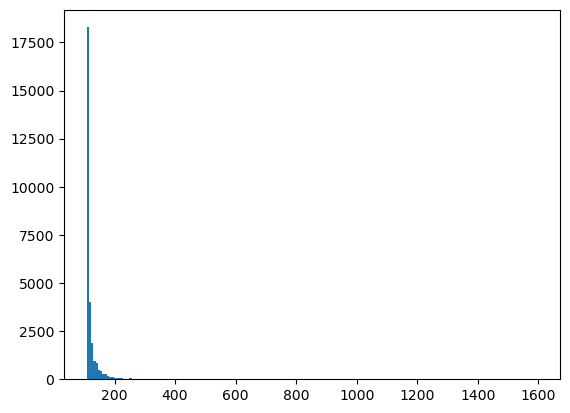

In [6]:
mInt = cdf["measure_median_GFP"].values
plt.hist(mInt, bins=200)

(array([1.000e+00, 1.000e+00, 3.800e+01, 1.165e+03, 2.633e+03, 3.093e+03,
        2.921e+03, 2.749e+03, 2.298e+03, 1.868e+03, 1.430e+03, 1.163e+03,
        9.350e+02, 7.330e+02, 5.830e+02, 4.850e+02, 4.440e+02, 3.450e+02,
        2.740e+02, 3.050e+02, 2.450e+02, 2.810e+02, 2.310e+02, 2.630e+02,
        2.260e+02, 2.360e+02, 2.010e+02, 1.890e+02, 1.920e+02, 1.840e+02,
        1.370e+02, 1.410e+02, 1.510e+02, 1.370e+02, 1.130e+02, 1.350e+02,
        7.800e+01, 1.080e+02, 8.800e+01, 1.060e+02, 7.900e+01, 7.700e+01,
        8.000e+01, 8.000e+01, 9.000e+01, 7.500e+01, 6.700e+01, 6.500e+01,
        6.300e+01, 6.600e+01, 4.800e+01, 4.500e+01, 4.700e+01, 4.400e+01,
        3.800e+01, 3.500e+01, 3.700e+01, 3.600e+01, 3.400e+01, 2.300e+01,
        2.800e+01, 2.300e+01, 1.900e+01, 2.400e+01, 1.700e+01, 1.600e+01,
        1.600e+01, 2.300e+01, 1.500e+01, 2.200e+01, 1.200e+01, 1.700e+01,
        1.300e+01, 1.100e+01, 1.100e+01, 1.500e+01, 9.000e+00, 1.400e+01,
        1.100e+01, 1.600e+01, 7.000e+0

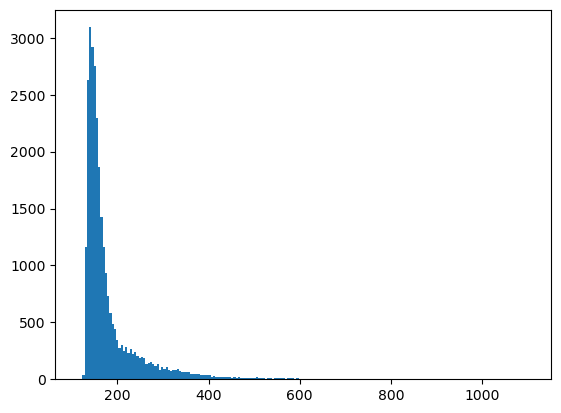

In [7]:
ABmInt = cdf["measure_median_AB"].values
plt.hist(ABmInt, bins=200)

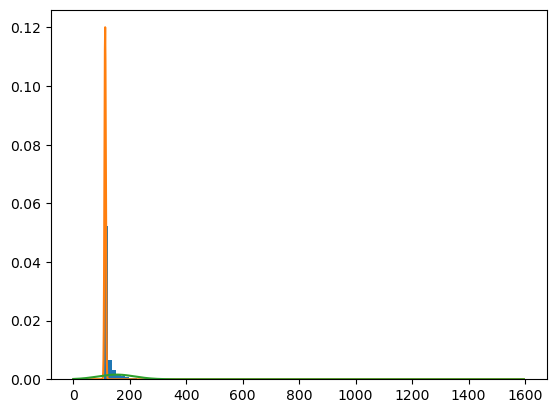

In [8]:
from sklearn.mixture import GaussianMixture
GM2 = GaussianMixture(n_components=2).fit(mInt.reshape(-1,1))
GM2m = GM2.means_
GM2cov = GM2.covariances_
plt.hist(mInt,bins=100,density=True)
x_val = np.arange(0, np.max(mInt), 1)
i = 0
while i < GM2.means_.shape[0]:
    w = GM2.weights_[i]
    m = GM2.means_[i][0]
    v = math.sqrt(GM2.covariances_[i][0])
    plt.plot(x_val, w*norm.pdf(x_val, m, v))
    i = i+1
plt.show()

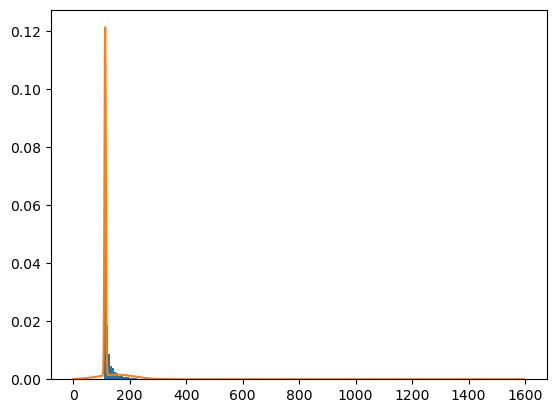

In [9]:
x_val = np.arange(0, np.max(mInt), 1)
plt.hist(mInt,bins=200,density=True)
plt.plot(x_val, GM2.weights_[0]*norm.pdf(x_val, GM2.means_[0][0], math.sqrt(GM2.covariances_[0][0]))+GM2.weights_[1]*norm.pdf(x_val, GM2.means_[1][0], math.sqrt(GM2.covariances_[1][0])))
plt.show()

0.6650762184168093
0.282721426129856
0.05220235545333478


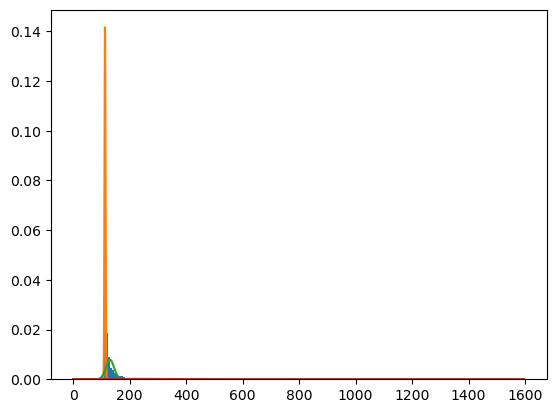

In [10]:
from sklearn.mixture import GaussianMixture
GM3 = GaussianMixture(n_components=3).fit(mInt.reshape(-1,1))
GM3m = GM3.means_
GM3cov = GM3.covariances_
plt.hist(mInt,bins=200,density=True)
x_val = np.arange(0, np.max(mInt), 1)
i = 0
while i < GM3.means_.shape[0]:
    w = GM3.weights_[i]
    print(w)
    m = GM3.means_[i][0]
    v = math.sqrt(GM3.covariances_[i][0])
    plt.plot(x_val, w*norm.pdf(x_val, m, v))
    i = i+1
plt.show()

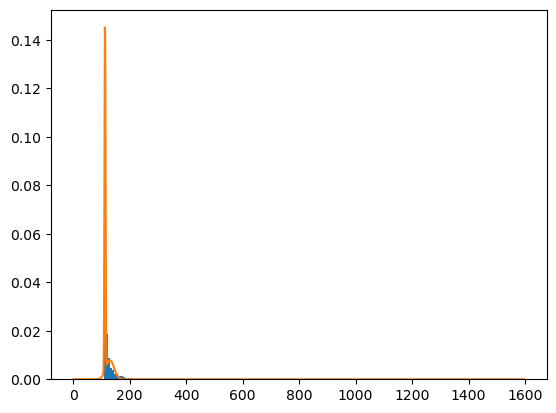

In [11]:
x_val = np.arange(0, np.max(mInt), 1)
plt.hist(mInt,bins=200,density=True)
plt.plot(x_val, GM3.weights_[0]*norm.pdf(x_val, GM3.means_[0][0], math.sqrt(GM3.covariances_[0][0]))+GM3.weights_[1]*norm.pdf(x_val, GM3.means_[1][0], math.sqrt(GM3.covariances_[1][0])))
plt.show()

In [12]:
cdf["G2_GFP"] = GM2.predict(mInt.reshape(-1,1))
cdf["G3_GFP"] = GM3.predict(mInt.reshape(-1,1))
cdf.head()

,Unnamed: 0,label,bbox-0_GFP,bbox-1_GFP,bbox-2_GFP,bbox-3_GFP,intensity_max_GFP,intensity_min_GFP,intensity_mean_GFP,measure_median_GFP,...,bbox-2_AB,bbox-3_AB,intensity_max_AB,intensity_min_AB,intensity_mean_AB,measure_median_AB,NDID,CID,G2_GFP,G3_GFP
0,0,1,1371,789,1694,1097,131.0,92.0,110.967443,111.0,...,1694,1097,201.0,103.0,136.116352,134.0,0,1,0,0
1,1,2,755,536,1086,906,131.0,92.0,111.605168,111.0,...,1086,906,198.0,107.0,141.408126,140.0,0,2,0,0
2,2,3,1831,1320,2048,1589,147.0,94.0,119.543002,119.0,...,2048,1589,227.0,111.0,150.321190,147.0,0,3,0,1
3,3,4,178,805,453,1229,205.0,93.0,115.686093,114.0,...,453,1229,240.0,111.0,141.422976,140.0,0,4,0,0
4,4,5,1481,1146,1719,1361,242.0,95.0,148.879309,151.0,...,1719,1361,452.0,108.0,229.511708,242.0,0,5,1,1


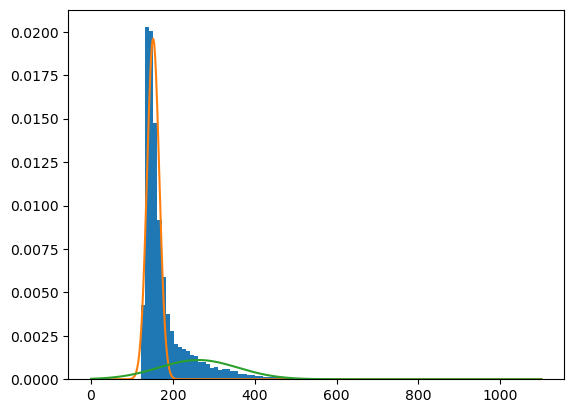

In [13]:
from sklearn.mixture import GaussianMixture
GM2AB = GaussianMixture(n_components=2).fit(ABmInt.reshape(-1,1))
GM2ABm = GM2AB.means_
GM2ABcov = GM2AB.covariances_
plt.hist(ABmInt,bins=100,density=True)
x_val = np.arange(0, np.max(ABmInt), 1)
i = 0
while i < GM2AB.means_.shape[0]:
    w = GM2AB.weights_[i]
    m = GM2AB.means_[i][0]
    v = math.sqrt(GM2AB.covariances_[i][0])
    plt.plot(x_val, w*norm.pdf(x_val, m, v))
    i = i+1
plt.show()

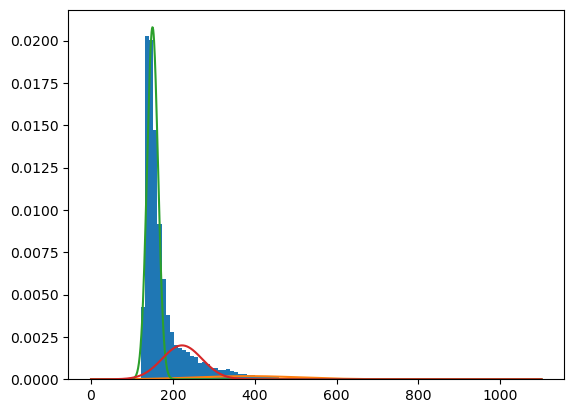

In [14]:
from sklearn.mixture import GaussianMixture
GM3AB = GaussianMixture(n_components=3).fit(ABmInt.reshape(-1,1))
GM3ABm = GM3AB.means_
GM3ABcov = GM3AB.covariances_
plt.hist(ABmInt,bins=100,density=True)
x_val = np.arange(0, np.max(ABmInt), 1)
i = 0
while i < GM3AB.means_.shape[0]:
    w = GM3AB.weights_[i]
    m = GM3AB.means_[i][0]
    v = math.sqrt(GM3AB.covariances_[i][0])
    plt.plot(x_val, w*norm.pdf(x_val, m, v))
    i = i+1
plt.show()

In [15]:
cdf["G2_AB"] = GM2AB.predict(ABmInt.reshape(-1,1))
cdf["G3_AB"] = GM3AB.predict(ABmInt.reshape(-1,1))
cdf.head()

,Unnamed: 0,label,bbox-0_GFP,bbox-1_GFP,bbox-2_GFP,bbox-3_GFP,intensity_max_GFP,intensity_min_GFP,intensity_mean_GFP,measure_median_GFP,...,intensity_max_AB,intensity_min_AB,intensity_mean_AB,measure_median_AB,NDID,CID,G2_GFP,G3_GFP,G2_AB,G3_AB
0,0,1,1371,789,1694,1097,131.0,92.0,110.967443,111.0,...,201.0,103.0,136.116352,134.0,0,1,0,0,0,1
1,1,2,755,536,1086,906,131.0,92.0,111.605168,111.0,...,198.0,107.0,141.408126,140.0,0,2,0,0,0,1
2,2,3,1831,1320,2048,1589,147.0,94.0,119.543002,119.0,...,227.0,111.0,150.321190,147.0,0,3,0,1,0,1
3,3,4,178,805,453,1229,205.0,93.0,115.686093,114.0,...,240.0,111.0,141.422976,140.0,0,4,0,0,0,1
4,4,5,1481,1146,1719,1361,242.0,95.0,148.879309,151.0,...,452.0,108.0,229.511708,242.0,0,5,1,1,1,2


In [16]:
cdf.groupby("G2_GFP")["intensity_mean_GFP"].mean()

G2_GFP
0    113.299043
1    156.735735
Name: intensity_mean_GFP, dtype: float64

In [17]:
includeGFP = 1
GFPdf = cdf[cdf["G2_GFP"]==includeGFP]
GFPdf = GFPdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")
GFPdf.groupby("Group1")["intensity_mean_GFP"].mean()

Group1
FY    137.946171
TP    150.815129
X     168.541284
Name: intensity_mean_GFP, dtype: float64

In [18]:
includeGFP = 0
GFPdf = cdf[cdf["G2_GFP"]==includeGFP]
GFPdf = GFPdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")
GFPdf.groupby("Group1")["intensity_mean_GFP"].count()/cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_").groupby("Group1")["intensity_mean_GFP"].count()

Group1
FY    0.879623
TP    0.755788
X     0.590835
Name: intensity_mean_GFP, dtype: float64

In [19]:
cdf.groupby("G2_AB")["intensity_mean_AB"].mean()

G2_AB
0    153.823111
1    281.041101
Name: intensity_mean_AB, dtype: float64

In [20]:
includeGFP = 0
GFPdf = cdf[cdf["G2_AB"]==includeGFP]
GFPdf = GFPdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")
GFPdf.groupby("Group1")["intensity_mean_AB"].mean()

Group1
FY    145.816090
TP    162.301638
X     155.192640
Name: intensity_mean_AB, dtype: float64

In [21]:
includeGFP = 1
GFPdf = cdf[cdf["G2_AB"]==includeGFP]
GFPdf = GFPdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")
GFPdf.groupby("Group1")["intensity_mean_AB"].count()/cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_").groupby("Group1")["intensity_mean_AB"].count()

Group1
FY    0.145931
TP    0.266105
X     0.317516
Name: intensity_mean_AB, dtype: float64

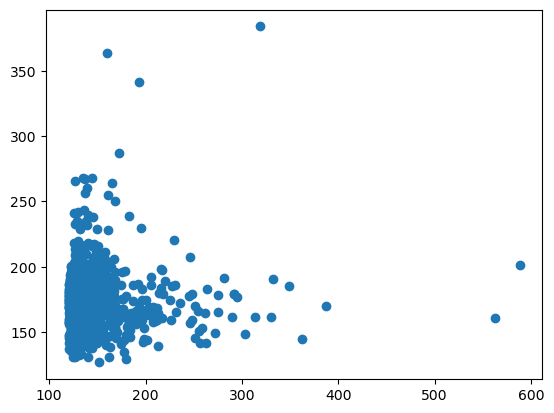

In [22]:
Xlin = cdf["intensity_mean_GFP"][cdf["G2_GFP"]==1][cdf["G2_AB"]==0].values
Ylin = cdf["intensity_mean_AB"][cdf["G2_GFP"]==1][cdf["G2_AB"]==0].values
plt.scatter(Xlin, Ylin)

In [23]:
combdf = cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")
combdf = combdf[combdf["G2_GFP"]==1]
combdf = combdf[combdf["G2_AB"]==0]
from sklearn.linear_model import LinearRegression
for g in combdf["Group1"].unique():
    Xlg = combdf["intensity_mean_GFP"][combdf["Group1"]==g].values.reshape(-1, 1)
    Ylg = combdf["intensity_mean_AB"][combdf["Group1"]==g].values.reshape(-1, 1)
    reg = LinearRegression().fit(Xlg, Ylg)
    score = reg.score(Xlg, Ylg)
    print(g+": "+str(score))


X: 0.006142111880483081
TP: 0.0010728277547691345
FY: 0.0010809974370269426


X: [[0.04309699]]
TP: [[0.0313362]]
FY: [[0.05444933]]


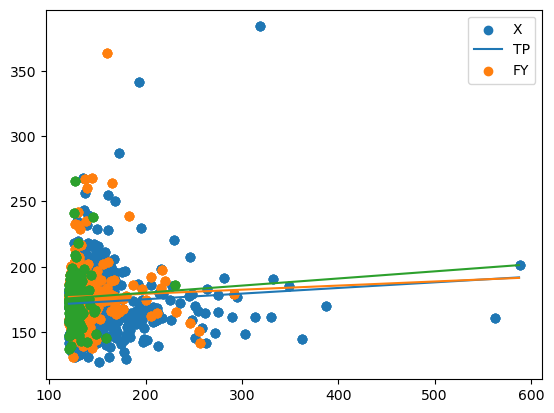

In [24]:
combdf = cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")
combdf = combdf[combdf["G2_GFP"]==1]
combdf = combdf[combdf["G2_AB"]==0]
from sklearn.linear_model import LinearRegression
for g in combdf["Group1"].unique():
    Xlg = combdf["intensity_mean_GFP"][combdf["Group1"]==g].values
    Ylg = combdf["intensity_mean_AB"][combdf["Group1"]==g].values
    plt.scatter(Xlg,Ylg)
    reg = LinearRegression().fit(Xlg.reshape(-1, 1), Ylg.reshape(-1, 1))
    xval = np.arange(combdf["intensity_mean_GFP"].min(),combdf["intensity_mean_GFP"].max(),1)
    plt.plot(xval, xval*float(reg.coef_)+reg.intercept_)
    print(g+": "+str(reg.coef_))
plt.legend(combdf["Group1"].unique())
plt.show()


In [25]:
cdf.groupby("G3_GFP")["measure_median_GFP"].mean()

G3_GFP
0    112.466862
1    132.139881
2    238.077912
Name: measure_median_GFP, dtype: float64

In [26]:
cdf.groupby("G3_AB")["measure_median_AB"].mean()

G3_AB
0    423.999263
1    150.348110
2    232.011310
Name: measure_median_AB, dtype: float64

In [27]:
GFPdf = cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")
GFPdf.groupby(["Group1","G3_GFP"])["intensity_mean_GFP"].count()/cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_").groupby("Group1")["intensity_mean_AB"].count()

Group1  G3_GFP
FY      0         0.834374
        1         0.157940
        2         0.007686
TP      0         0.696600
        1         0.265136
        2         0.038264
X       0         0.527357
        1         0.364467
        2         0.108176
dtype: float64

In [28]:
cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_").groupby("Group1")["intensity_mean_AB"].count()

Group1
FY    41636
TP    41292
X     31948
Name: intensity_mean_AB, dtype: int64

In [29]:
GFPdf = cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")
GFPdf.groupby(["Group1","G3_GFP"])["intensity_mean_GFP"].count()

Group1  G3_GFP
FY      0         34740
        1          6576
        2           320
TP      0         28764
        1         10948
        2          1580
X       0         16848
        1         11644
        2          3456
Name: intensity_mean_GFP, dtype: int64

In [30]:
GFPdf.groupby(["Group1","G3_GFP"])["intensity_mean_GFP"].count()

Group1  G3_GFP
FY      0         34740
        1          6576
        2           320
TP      0         28764
        1         10948
        2          1580
X       0         16848
        1         11644
        2          3456
Name: intensity_mean_GFP, dtype: int64

In [31]:
GFPdf.groupby(["Group1","G3_AB"])["intensity_mean_GFP"].count()/cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_").groupby("Group1")["intensity_mean_AB"].count()

Group1  G3_AB
FY      0        0.019022
        1        0.833606
        2        0.147372
TP      0        0.052698
        1        0.685266
        2        0.262036
X       0        0.079504
        1        0.655816
        2        0.264680
dtype: float64

In [32]:
df = cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")

In [33]:
dfGFP = df[df["G3_GFP"]==2]
dfAB = df[df["G3_AB"]==2]

PathPatch6((0.6, 184) ...)
PathPatch6((1.6, 181) ...)
PathPatch6((2.6, 177.75) ...)
1
X vs. TP: -2.220446049250313e-16
1
X vs. FY: -2.220446049250313e-16
PathPatch6((0.6, 204) ...)
PathPatch6((1.6, 193) ...)
PathPatch6((2.6, 198) ...)
1
X vs. TP: -2.220446049250313e-16
1
X vs. FY: -2.220446049250313e-16


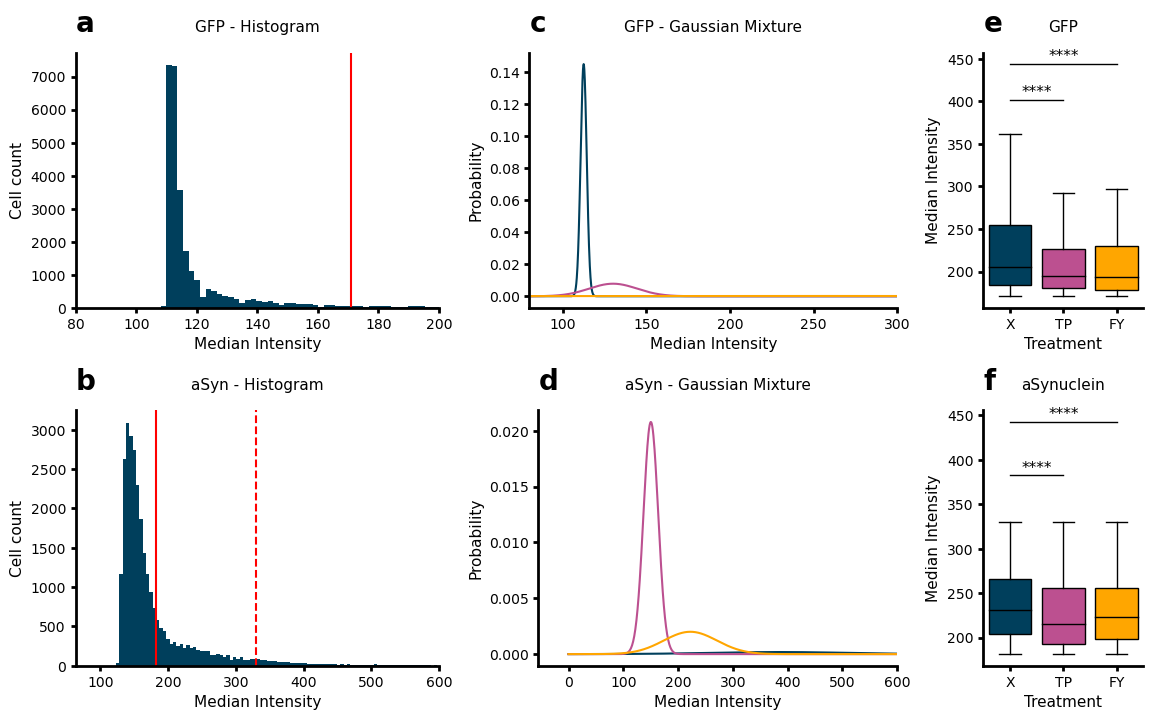

In [34]:
sigp = [["X","TP"],["X","FY"]]

params = pp.loadparams()
#sns.set_palette(sns.color_palette(params["Colors"]))
bs = params["BarSize"]
ls = params["LS"]
fig = plt.figure(constrained_layout=True, figsize=(29*pp.cm,18*pp.cm))
subfigs = fig.subfigures(2,3,width_ratios=(2,2,1))
axUp = subfigs[0][2].subplots(1, 1, sharey=True)
X1 = []
Y1 = []
CI1 = []
maxvs = 0
for g in ['X','TP', 'FY']:
    X1.append(g)
    Y1.append(dfGFP["measure_median_GFP"][dfGFP["Group1"]==g])
    CI1.append(1.96*(dfGFP["measure_median_GFP"][dfGFP["Group1"]==g].std())/math.sqrt(len(dfGFP[dfGFP["Group1"]==g])))
#axUp.bar(X1,Y1,0.8, yerr = CI1, capsize=4, linewidth=2, edgecolor="black",color=params["Colors"])
bplot1 = axUp.boxplot(Y1,widths=0.8,labels=X1, showfliers=False,patch_artist=True)
for axis in ['top','bottom','left','right']:
    axUp.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axUp.spines[axis].set_visible(False)
colors = params["Colors"]
for median in bplot1['medians']:
    median.set_color('black')
for patch, color in zip(bplot1['boxes'], colors):
    print(patch)
    patch.set_facecolor(color)
axUp.tick_params(width=ls)
maxv = axUp.get_ylim()[1]
hightind = 0
#axUp.set_ylim(ymin=dfGFP["intensity_mean_GFP"].min())
bottom, top = axUp.get_ylim()
y_range = maxv - bottom
#maxv = maxv+y_range*0.2
treatmenti = 0
for pairs in sigp:
    c1 = pairs[0]
    ctrli = X1.index(c1)
    c2 = pairs[1]
    treatmenti = X1.index(c2)
    c1dic = {c1:ctrli+1}
    c2dic = {c2:treatmenti+1}
    diff = ((treatmenti-ctrli)/2)+1
    pp.drawsigbars(df, axUp, "Group1", "measure_median_GFP", c1dic, c2dic, maxv+hightind, y_range, diff)
    hightind = hightind + y_range*0.2
axUp.set_title("GFP", fontsize=11)
axUp.set_title("e", loc="left", fontsize=20, fontweight="bold", pad=15)
axUp.set_xlabel("Treatment", fontsize=11)
axUp.set_ylabel("Median Intensity", fontsize=11)


axLo = subfigs[1][2].subplots(1, 1, sharey=True)
X2 = []
Y2 = []
CI2 = []
maxvs = 0
for g in ['X','TP', 'FY']:
    X2.append(g)
    Y2.append(dfAB["measure_median_AB"][dfAB["Group1"]==g])
    CI2.append(1.96*(dfAB["measure_median_AB"][dfAB["Group1"]==g].std())/math.sqrt(len(dfAB[dfAB["Group1"]==g])))
#axLo.bar(X2,Y2,0.8, yerr = CI2, capsize=4, linewidth=2, edgecolor="black",color=params["Colors"])
bplot = axLo.boxplot(Y2,widths=0.8,labels=X2, showfliers=False,patch_artist=True)
for axis in ['top','bottom','left','right']:
    axLo.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axLo.spines[axis].set_visible(False)
axLo.tick_params(width=ls)
#maxv = np.max(np.array(Y2)+np.array(CI2))
maxv = (axLo.get_ylim()[1])
hightind = 0
#axLo.set_ylim(ymin=dfAB["intensity_mean_AB"].min())
colors = params["Colors"]
for median in bplot['medians']:
    median.set_color('black')
for patch, color in zip(bplot['boxes'], colors):
    print(patch)
    patch.set_facecolor(color)
bottom, top = axUp.get_ylim()
y_range = top - bottom
treatmenti = 0
for pairs in sigp:
    c1 = pairs[0]
    ctrli = X2.index(c1)
    c2 = pairs[1]
    treatmenti = X2.index(c2)
    c1dic = {c1:ctrli+1}
    c2dic = {c2:treatmenti+1}
    diff = ((treatmenti-ctrli)/2)+1
    pp.drawsigbars(df, axLo, "Group1", "measure_median_AB", c1dic, c2dic, maxv+hightind, y_range, diff)
    hightind = hightind + y_range*0.2
axLo.set_title("aSynuclein", fontsize=11)
axLo.set_title("f", loc="left", fontsize=20, fontweight="bold", pad=15)
axLo.set_xlabel("Treatment", fontsize=11)
axLo.set_ylabel("Median Intensity", fontsize=11)

axL1 = subfigs[0][1].subplots(1, 1, sharey=True)
x_val = np.arange(0, np.max(mInt), 0.1)
i = 0
#axL1.hist(mInt,bins=100,density=True,color=params["Colors"][0])
while i < GM3.means_.shape[0]:
    w = GM3.weights_[i]
    m = GM3.means_[i][0]
    v = math.sqrt(GM3.covariances_[i][0])
    axL1.plot(x_val, w*norm.pdf(x_val, m, v),color=params["Colors"][i])
    i = i+1
for axis in ['top','bottom','left','right']:
    axL1.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axL1.spines[axis].set_visible(False)
axL1.tick_params(width=ls)
axL1.set_title("GFP - Gaussian Mixture", fontsize=11)
axL1.set_title("c", loc="left", fontsize=20, fontweight="bold", pad=15)
axL1.set_xlabel("Median Intensity", fontsize=11)
axL1.set_ylabel("Probability", fontsize=11)
axL1.set_xlim(xmin=80,xmax=300)

axL2 = subfigs[1][1].subplots(1, 1, sharey=True)
x_val = np.arange(0, np.max(ABmInt), 1)
i = 0
#axL2.hist(ABmInt,bins=200,density=True,color=params["Colors"][0])
while i < GM3AB.means_.shape[0]:
    w = GM3AB.weights_[i]
    m = GM3AB.means_[i][0]
    v = math.sqrt(GM3AB.covariances_[i][0])
    axL2.plot(x_val, w*norm.pdf(x_val, m, v),color=params["Colors"][i])
    i = i+1
for axis in ['top','bottom','left','right']:
    axL2.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axL2.spines[axis].set_visible(False)
axL2.tick_params(width=ls)
axL2.set_title("aSyn - Gaussian Mixture", fontsize=11)
axL2.set_title("d", loc="left", fontsize=20, fontweight="bold", pad=15)
axL2.set_xlabel("Median Intensity", fontsize=11)
axL2.set_ylabel("Probability", fontsize=11)
axL2.set_xlim(xmax=600)
#axL2.set_yticklabels([])


axL3 = subfigs[0][0].subplots(1, 1, sharey=True)
axL3.hist(mInt,bins=800,color=params["Colors"][0])
for axis in ['top','bottom','left','right']:
    axL3.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axL3.spines[axis].set_visible(False)
axL3.axvline(dfGFP["measure_median_GFP"].min(), color = 'r')
axL3.axvline(dfGFP["measure_median_GFP"].max(), color = 'r',linestyle="--")
axL3.tick_params(width=ls)
axL3.set_title("GFP - Histogram", fontsize=11)
axL3.set_title("a", loc="left", fontsize=20, fontweight="bold", pad=15)
axL3.set_xlabel("Median Intensity", fontsize=11)
axL3.set_ylabel("Cell count", fontsize=11)
axL3.set_xlim(xmin=80,xmax=200)

axL4 = subfigs[1][0].subplots(1, 1, sharey=True)
axL4.hist(ABmInt,bins=200,color=params["Colors"][0])
for axis in ['top','bottom','left','right']:
    axL4.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axL4.spines[axis].set_visible(False)
axL4.tick_params(width=ls)
axL4.axvline(dfAB["measure_median_AB"].min(), color = 'r')
axL4.axvline(dfAB["measure_median_AB"].max(), color = 'r',linestyle="--")
axL4.set_title("aSyn - Histogram", fontsize=11)
axL4.set_title("b", loc="left", fontsize=20, fontweight="bold", pad=15)
axL4.set_xlabel("Median Intensity", fontsize=11)
axL4.set_ylabel("Cell count", fontsize=11)
axL4.set_xlim(xmax=600)


plt.show()

In [35]:
chidf = cdf.join(idf.set_index('NDID'), on="NDID", rsuffix="_")
chidf.groupby(["Group1","G3_GFP"])["measure_median_GFP"].count()

Group1  G3_GFP
FY      0         34740
        1          6576
        2           320
TP      0         28764
        1         10948
        2          1580
X       0         16848
        1         11644
        2          3456
Name: measure_median_GFP, dtype: int64

In [36]:
chidf.groupby(["Group1","G3_GFP"])["measure_median_GFP"].count()*100/chidf.groupby("Group1")["measure_median_GFP"].count()

Group1  G3_GFP
FY      0         83.437410
        1         15.794024
        2          0.768566
TP      0         69.659983
        1         26.513610
        2          3.826407
X       0         52.735696
        1         36.446726
        2         10.817579
Name: measure_median_GFP, dtype: float64

In [37]:
chidf.groupby(["Group1","G3_GFP"])["measure_median_GFP"].median()

Group1  G3_GFP
FY      0         111.0
        1         124.0
        2         194.0
TP      0         112.0
        1         128.0
        2         195.0
X       0         113.0
        1         131.0
        2         205.0
Name: measure_median_GFP, dtype: float64

In [38]:
chidf.groupby(["Group1","G3_AB"])["measure_median_AB"].count()*100/chidf.groupby("Group1")["measure_median_AB"].count()

Group1  G3_AB
FY      0         1.902200
        1        83.360553
        2        14.737247
TP      0         5.269786
        1        68.526591
        2        26.203623
X       0         7.950419
        1        65.581570
        2        26.468011
Name: measure_median_AB, dtype: float64

In [39]:
chidf.groupby(["Group1","G3_AB"])["measure_median_AB"].median()

Group1  G3_AB
FY      0        383.0
        1        140.0
        2        223.0
TP      0        386.0
        1        158.0
        2        215.0
X       0        394.0
        1        149.0
        2        231.0
Name: measure_median_AB, dtype: float64

In [40]:
from scipy.stats import chi2_contingency
XGFP = chidf[chidf["Group1"]=="X"].groupby("G3_GFP")["measure_median_GFP"].count().values
TPGFP = chidf[chidf["Group1"]=="TP"].groupby("G3_GFP")["measure_median_GFP"].count().values
FYGFP = chidf[chidf["Group1"]=="FY"].groupby("G3_GFP")["measure_median_GFP"].count().values
print(XGFP)
res = chi2_contingency([XGFP,TPGFP])
print(res)
res = chi2_contingency([XGFP,FYGFP])
print(res)

[16848 11644  3456]
(2684.89393703928, 0.0, 2, array([[19896.3978154 ,  9854.85002731,  2196.75215729],
       [25715.6021846 , 12737.14997269,  2839.24784271]]))
(9101.817572776996, 0.0, 2, array([[22397.98630137,  7910.58599696,  1639.42770167],
       [29190.01369863, 10309.41400304,  2136.57229833]]))


In [41]:
from scipy.stats import chi2_contingency
XGFP = chidf[chidf["Group1"]=="X"].groupby("G3_AB")["measure_median_AB"].count().values
TPGFP = chidf[chidf["Group1"]=="TP"].groupby("G3_AB")["measure_median_AB"].count().values
FYGFP = chidf[chidf["Group1"]=="FY"].groupby("G3_AB")["measure_median_AB"].count().values
print(XGFP)
res = chi2_contingency([XGFP,TPGFP])
print(res)
res = chi2_contingency([XGFP,FYGFP])
print(res)

[ 2540 20952  8456]
(224.71775116829824, 1.5964684524921172e-49, 2, array([[ 2057.16504642, 21482.45636264,  8408.37859093],
       [ 2658.83495358, 27765.54363736, 10867.62140907]]))
(3470.222124834845, 0.0, 2, array([[ 1446.65601218, 24165.92846271,  6335.41552511],
       [ 1885.34398782, 31494.07153729,  8256.58447489]]))


In [42]:
from numpy import random
from scipy.stats import pearsonr
Xrng = chidf[chidf["Group1"]=="X"][["measure_median_GFP","measure_median_AB"]].to_numpy()
TPrng = chidf[chidf["Group1"]=="TP"][["measure_median_GFP","measure_median_AB"]].to_numpy()
FYrng = chidf[chidf["Group1"]=="FY"][["measure_median_GFP","measure_median_AB"]].to_numpy()
print(pearsonr(Xrng.T[0],Xrng.T[1]))
print(pearsonr(TPrng.T[0],TPrng.T[1]))
print(pearsonr(FYrng.T[0],FYrng.T[1]))

(0.6379945580316257, 0.0)
(0.6906468602116367, 0.0)
(0.7513971056407532, 0.0)


In [44]:
from numpy import random
from scipy.stats import spearmanr
import time
start_time = time.time()
Xrng = chidf[chidf["Group1"]=="X"][["measure_median_GFP","measure_median_AB"]].to_numpy()
TPrng = chidf[chidf["Group1"]=="TP"][["measure_median_GFP","measure_median_AB"]].to_numpy()
FYrng = chidf[chidf["Group1"]=="FY"][["measure_median_GFP","measure_median_AB"]].to_numpy()
DTP = []
DFY = []
X = []
TP = []
FY = []
for i in range(10000):
    rng = np.random.default_rng()
    XR = rng.choice(Xrng,replace=True,size=Xrng.shape[0],axis=0)
    TPR = rng.choice(TPrng,replace=True,size=TPrng.shape[0],axis=0)
    FYR = rng.choice(FYrng,replace=True,size=FYrng.shape[0],axis=0)
    SpX,pX = pearsonr(XR.T[0],XR.T[1])
    SpTP, pTP = pearsonr(TPR.T[0],TPR.T[1])
    SpFY, pFY = pearsonr(FYR.T[0],FYR.T[1])
    X.append(SpX)
    TP.append(SpTP)
    FY.append(SpFY)
    dTP = SpX - SpTP
    dFY = SpX - SpFY
    DTP.append(dTP)
    DFY.append(dFY)
print(len(DTP))
print(len(DFY))
print("--- %s seconds ---" % (time.time() - start_time))

10000
10000
--- 39.16064763069153 seconds ---


In [45]:
from scipy.stats import norm
P = {}
TPtup = norm.fit(DTP)
P["TP"] = norm(loc = TPtup[0] , scale = TPtup[1]).cdf(0)
FYtup = norm.fit(DFY)
P["FY"] = norm(loc = FYtup[0] , scale = FYtup[1]).cdf(0)

In [49]:
print(P)

{'TP': 0.9785152002965781, 'FY': 0.9999999999999979}


In [46]:
CI = {}
CI["X"] = [np.percentile(np.array(X),2.5),np.percentile(np.array(X),97.5)]
CI["TP"] = [np.percentile(np.array(TP),2.5),np.percentile(np.array(TP),97.5)]
CI["FY"] = [np.percentile(np.array(FY),2.5),np.percentile(np.array(FY),97.5)]
print(CI)

{'X': [0.6199538309800905, 0.6569282410055562], 'TP': [0.645796729911849, 0.7453069553891912], 'FY': [0.7308102355341963, 0.7733596559367741]}


In [47]:
print(np.mean(X))
print(np.mean(TP))
print(np.mean(FY))

0.6383460819495056
0.6932690573451177
0.7519850200495678


In [48]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [ ]:

def drawsigbars(ax, ctrl, treatment, maxv, y_range, diff,pv):
    import matplotlib.pyplot as plt
    import pathophys as pp
    ctrls = ctrl
    treatments = treatment
    if (type(ctrl) is dict) == True:
        ctrls = list(ctrl.keys())[0]
        ctrl = ctrl[ctrls]
        treatments = list(treatment.keys())[0]
        treatment = treatment[treatments]
        print(ctrl)
    ax.plot(
        [ctrl, ctrl, treatment, treatment],
        [maxv, maxv, maxv, maxv], lw=2, c='k'
    )
    p = convert_pvalue_to_asterisks(pv)
    ax.text((ctrl+diff), maxv, p, ha='center', va='bottom', fontsize=11)


import pathophys as pp
sigp = [["Ctrl","TP"],["Ctrl","FY"]]
titledic = {"X":"Ctrl","TP":"TP","FY":"FY"}


params = pp.loadparams()
#sns.set_palette(sns.color_palette(params["Colors"]))
bs = params["BarSize"]
print(bs)
ls = params["LS"]
fig = plt.figure(constrained_layout=True, figsize=(18*pp.cm,9*pp.cm))
subfigs = fig.subfigures(1,2,width_ratios=(1,1))
ax = subfigs[0].subplots(1, 1, sharey=True)
cond = []
maxvs = 0
colorcount=0
for g in ["X","TP","FY"]:
    color = params["Colors"][colorcount]
    Xrng = chidf[chidf["Group1"]==g][["measure_median_GFP","measure_median_AB"]].to_numpy()
    x = titledic[g]
    cond.append(x)
    y = pearsonr(Xrng.T[0],Xrng.T[1])[0]
    ci = np.array([np.abs(CI[g]-y)]).T
    ax.bar(x, y, 0.8, yerr=ci, capsize=4, linewidth=ls, edgecolor="black",color=color)
    colorcount=colorcount+1
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        ax.spines[axis].set_visible(False)
colors = params["Colors"]

maxv = ax.get_ylim()[1]
hightind = 0
#axUp.set_ylim(ymin=dfGFP["intensity_mean_GFP"].min())
bottom, top = ax.get_ylim()
y_range = maxv - bottom
print(bottom)
#maxv = maxv+y_range*0.2
hightind = 0
for sp in sigp:
    c1 = sp[0]
    ctrli = cond.index(c1)
    c2 = sp[1]
    treatmenti = cond.index(c2)
    diff = (treatmenti-ctrli)/2
    p = P[c2]
    drawsigbars(ax, ctrli, treatmenti, maxv+hightind, y_range, diff,p)
    hightind = hightind + y_range*0.2
ax.set_title("Correlation", fontsize=11)
ax.set_title("c", loc="left", fontsize=20, fontweight="bold", pad=15)
ax.set_xlabel("Treatment", fontsize=11)
ax.set_ylabel("PCC", fontsize=11)



plt.show()

In [ ]:
plt.hist(FY)

In [ ]:
sigp = [["X","TP"],["X","FY"]]
params = pp.loadparams()
#sns.set_palette(sns.color_palette(params["Colors"]))
bs = params["BarSize"]
ls = params["LS"]
fig = plt.figure(constrained_layout=True, figsize=(20*pp.cm,10*pp.cm))
subfigs = fig.subfigures(1,2)

axUp = subfigs[0].subplots(1, 1, sharey=True)

reg = LinearRegression().fit(df2["Group"].values.reshape(-1, 1), df2["Mean"].values.reshape(-1, 1))
xval = np.arange(df2["Group"].min(),df2["Group"].max(),0.1)
axUp.plot(xval, xval*float(reg.coef_)+reg.intercept_,c="red")
axUp.scatter(df2["Group"],df2["Mean"],c="black",marker="x",s=20)
print("R2: "+str(reg.score(df2["Group"].values.reshape(-1, 1), df2["Mean"].values.reshape(-1, 1))))
i = 0
leg = []
for g in ['X','TP', 'FY']:
    leg.append(axUp.scatter((df["Mean"][df["Group"]==g].median()-reg.intercept_)/float(reg.coef_),df["Mean"][df["Group"]==g].median(),c=params["Colors"][i],marker="^",s=100))
    i = i+1
for axis in ['top','bottom','left','right']:
    axUp.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axUp.spines[axis].set_visible(False)
axUp.tick_params(width=ls)
handles, labels = axUp.get_legend_handles_labels()
print(handles, labels)
axUp.legend(leg,['X','TP', 'FY'])
axUp.set_title("Dilution", fontsize=11)
axUp.set_title("a", loc="left", fontsize=20, fontweight="bold", pad=15)
axUp.set_xlabel("GFP-Concentration (ng/µl)", fontsize=11)
axUp.set_ylabel("Mean Intensity ("+'$10^3$'+")", fontsize=11)

axLo = subfigs[1].subplots(1, 1, sharey=True)
X2 = []
Y2 = []
maxvs = []
for g in ['X','TP', 'FY']:
    X2.append(g)
    Y2.append(df["Mean"][df["Group"]==g])
    maxvs.append(df["Mean"][df["Group"]==g].quantile(0.75)+(1.5*(df["Mean"][df["Group"]==g].quantile(0.75)-df["Mean"][df["Group"]==g].quantile(0.25))))
    #CI1.append(1.96*(df["Mean"][df["Group"]==g].std())/math.sqrt(len(df[df["Group"]==g])))
bplot = axLo.boxplot(Y2,widths=0.8,labels=X2, showfliers=False,patch_artist=True)
colors = params["Colors"]
for median in bplot['medians']:
    median.set_color('black')
for patch, color in zip(bplot['boxes'], colors):
    print(patch)
    patch.set_facecolor(color)
for axis in ['top','bottom','left','right']:
    axLo.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axLo.spines[axis].set_visible(False)
axLo.tick_params(width=ls)
maxv2 = np.max(np.array(maxvs))
hightind = 0
bottom2, top2 = axLo.get_ylim()
y_range = top2 - bottom2
treatmenti = 0
args = [df["Mean"][df["Group"]==g].values for g in df["Group"].unique()]
m_comp = tukey_hsd(*args)
for pairs in sigp:
    c1 = pairs[0]
    ctrli = X2.index(c1)
    c2 = pairs[1]
    treatmenti = X2.index(c2)
    c1dic = {c1:ctrli+1}
    c2dic = {c2:treatmenti+1}
    diff = ((treatmenti-ctrli)/2)+1
    pp.drawsigbars(df, axLo, "Group", "Mean", c1dic, c2dic, maxv2+hightind, y_range, diff)
    hightind = hightind + y_range*0.2
axLo.set_title("Quenching (10 ng/µl)", fontsize=11)
axLo.set_title("b", loc="left", fontsize=20, fontweight="bold", pad=15)
axLo.set_xlabel("Treatment", fontsize=11)
axLo.set_ylabel("Mean Intensity ("+'$10^3$'+")", fontsize=11)


In [ ]:
import nd2
images = {"X":{},"TP":{},"FY":{}}
imdir = os.path.join(basedir,"1")
for i in os.listdir(imdir):
    if "large" in i:
        c = i.split("_")[0]
        with nd2.ND2File(os.path.join(imdir,i)) as ndfile:
            for j in range(len(ndfile.metadata.channels)):
                cn = ndfile.metadata.channels[j].channel.name
                img = ndfile.asarray()
                img = img[j,:,:]
                images[c][cn] = img
print(len(images))

In [ ]:
plt.rcParams['lines.linewidth'] = 10
ranges = [(0, 255),(0, 255),(0, 255)]
fig = plt.figure(constrained_layout=True, figsize=(6,8))
subfigs = fig.subfigures(1, 2, wspace=0, width_ratios=[1,1])
axGFP = subfigs[0].subplots(3, 1, sharex=True, sharey=True)
subfigs[0].suptitle("GFP", fontsize=11)
axGFP[0].imshow(images["X"]["GFP"])
axGFP[0].set_ylabel("X")
axGFP[1].imshow(images["TP"]["GFP"])
axGFP[1].set_ylabel("TP")
axGFP[2].imshow(images["FY"]["GFP"])
axGFP[2].set_ylabel("FY")
for ax in axGFP:
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)

axAB = subfigs[1].subplots(3, 1, sharex=True, sharey=True)
subfigs[1].suptitle("aSyn-Antibody", fontsize=11)
axAB[0].imshow(images["X"]["647"])
axAB[1].imshow(images["TP"]["647"])
axAB[2].imshow(images["FY"]["647"])
for ax in axAB:
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)


plt.show()